In [1]:
import pandas as pd
from matplotlib import pyplot as plt 

In [3]:
df=pd.read_csv('car driving risk analysis.csv')
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [4]:
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [5]:
df.tail()

,speed,risk
10,290,82
11,185,59
12,310,93
13,95,18
14,30,2


In [14]:
df.shape

(15, 2)

In [15]:
df.info

<bound method DataFrame.info of     speed  risk
0     200    95
1      90    20
2     300    98
3     110    60
4     240    72
5     115    10
6      50     7
7     230    85
8     190    45
9     260    91
10    290    82
11    185    59
12    310    93
13     95    18
14     30     2>

Text(0.5, 1.0, 'Car Driving Risk')

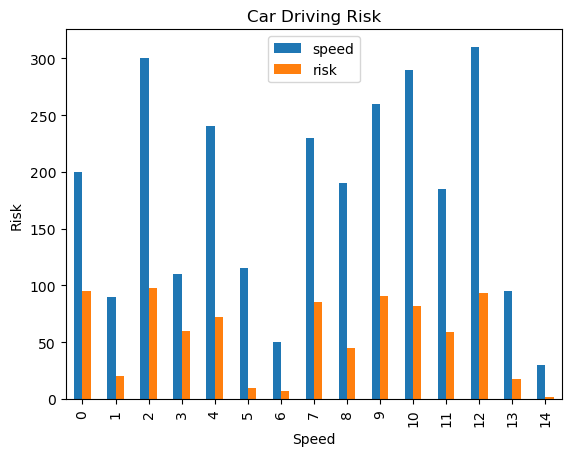

In [17]:
df.plot(kind='bar')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car Driving Risk')

In [7]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

In [8]:
df.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


Text(0.5, 1.0, 'Car Driving Risk')

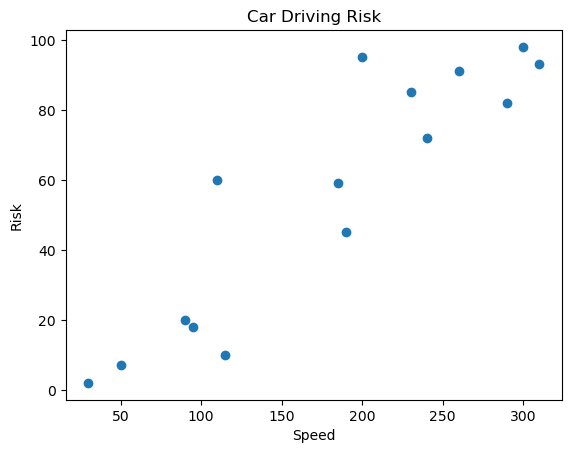

In [10]:
plt.scatter(df['speed'],df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car Driving Risk')

In [11]:
x=df[['speed']]
x

,speed
0,200
1,90
2,300
3,110
4,240
5,115
6,50
7,230
8,190
9,260


In [12]:
y=df[['risk']]
y

,risk
0,95
1,20
2,98
3,60
4,72
5,10
6,7
7,85
8,45
9,91


Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [18]:
reg=LinearRegression()

In [19]:
x.mean()

speed    179.666667
dtype: float64

In [20]:
y.mean()

risk    55.8
dtype: float64

Text(0.5, 1.0, 'Car Driving Risk')

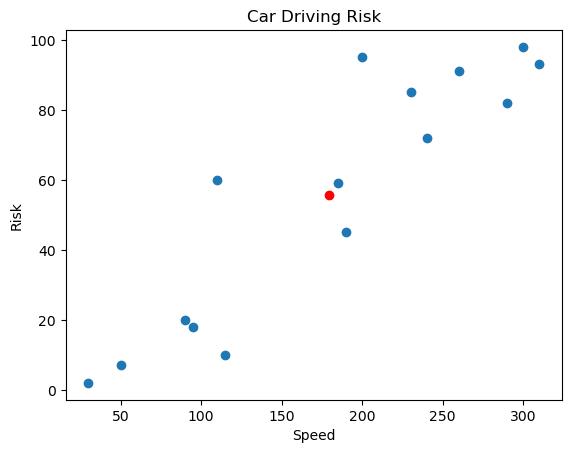

In [22]:
plt.scatter(x.mean(),y.mean(), color='red')
plt.scatter(df['speed'],df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car Driving Risk')

In [24]:
reg.fit(x,y)

LinearRegression()

In [25]:
m=reg.coef_
m

array([[0.35131645]])

In [27]:
c=reg.intercept_
c

array([-7.31985478])

In [28]:
m*350+c

array([[115.64090128]])

In [30]:
reg.predict([[350]])

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[115.64090128]])

In [43]:
reg.predict([[12]])

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-3.10405742]])

In [32]:
df['predicted']= reg.predict(x)
df

,speed,risk,predicted
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092
5,115,10,33.081537
6,50,7,10.245968
7,230,85,73.482928
8,190,45,59.430270
9,260,91,84.022421


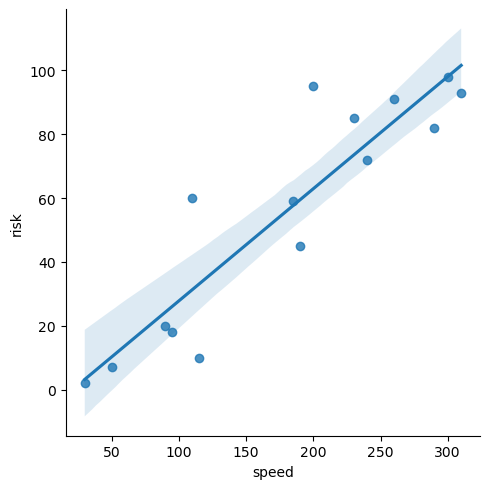

In [51]:
import seaborn as sns
sns.lmplot(x = 'speed', y = 'risk', data = df)

Text(0.5, 1.0, 'Car Driving Risk')

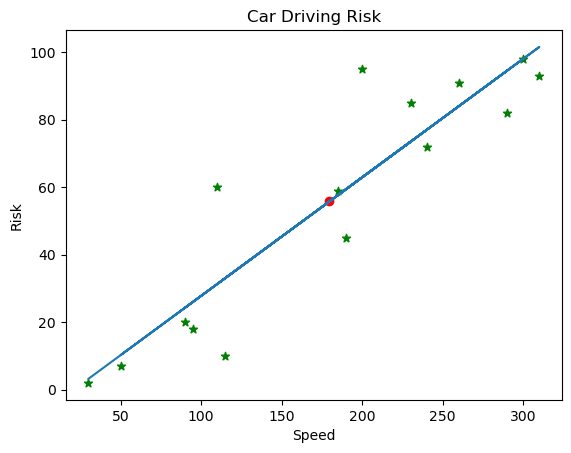

In [53]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(), color='red')
plt.scatter(df['speed'],df['risk'],marker = '*',color='green')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car Driving Risk')

Text(0.5, 1.0, 'Car Driving Risk')

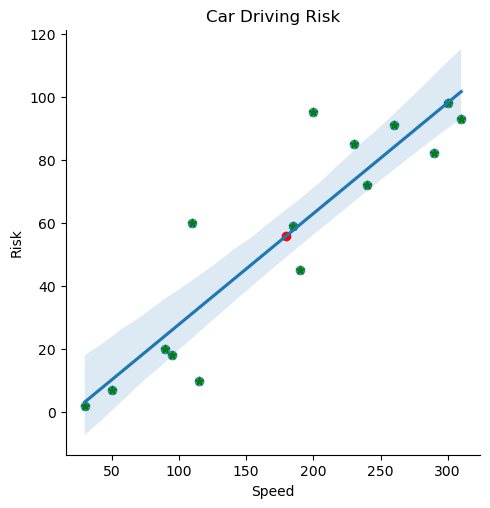

In [54]:
sns.lmplot(x = 'speed', y = 'risk', data = df)
plt.scatter(x.mean(),y.mean(), color='red')
plt.scatter(df['speed'],df['risk'],marker = '*',color='green')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car Driving Risk')

In [36]:
df['Difference']=df['risk']-df['predicted']
df

,speed,risk,predicted,Difference
0,200,95,62.943434,32.056566
1,90,20,24.298625,-4.298625
2,300,98,98.075079,-0.075079
3,110,60,31.324954,28.675046
4,240,72,76.996092,-4.996092
5,115,10,33.081537,-23.081537
6,50,7,10.245968,-3.245968
7,230,85,73.482928,11.517072
8,190,45,59.430270,-14.430270
9,260,91,84.022421,6.977579


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
mse=mean_squared_error(df['risk'],df['predicted'])
mse

208.3916597380042

In [39]:
mae=mean_absolute_error(df['risk'],df['predicted'])
mae

10.740343292130888

In [40]:
reg.score(x,y)

0.8260542394120296

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y,reg.predict(x))

0.8260542394120296